<p align="center">
Universidade Federal de Alagoas</br>

Instituto de Computação</br>

</p>

# Trabalho Prático AB2

Disciplina: Sistemas Distribuídos

Semestre letivo: 2016.2

Professor: André Lage Freitas

Aluno: Gean S. Santos

## Exemplo

Abaixo, segue um exemplo de implementação do B-multicast assíncrono em Julia.

In [1]:
# B-multicast asynchronous
function B_multicast_async(g, m, B_deliver)
    for p in g
        remotecall(p, B_deliver, m)
    end
end

# My group is composed by all workers
g = workers()

# Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
B_multicast_async(g, "oi!", println)

oi!


### Exercício 1: Sincronismo (2,0 pontos)

O comando abaixo adicione 10 processos que serão utilizados posteriormente por meio do comando _workers()_.

In [2]:
addprocs(10)

10-element Array{Any,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

**Tarefa**: Modificar a implementação do B-multicast do exemplo anterior para utilizar comunicação síncrona.

Abaixo está a implementação do B-multicast com comunicação síncrona.

In [3]:
# B-multicast synchronous
function B_multicast_sync(g, m, B_deliver)
    for p in g
        remotecall_wait(p, B_deliver, m)
    end
end

B_multicast_sync (generic function with 1 method)



Em seguida é feita a execução das duas versões do B-multicast (síncrona e assíncrona) para comparação das saídas.

In [4]:
# My group is composed by all workers (the 10 process previously added with 'addprocs(10)' command)
g = workers()

# Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
## Synchronous
@time B_multicast_sync(g, "oi!", println)
## Asynchronous
@time B_multicast_async(g, "oi!", println)

	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 10:	oi!
	From worker 11:	oi!
elapsed time: 1.080105254 seconds (2002020 bytes allocated)
elapsed time: 0.01083936 seconds (381384 bytes allocated)


**Questão**: A ordem das mensagens das saídas foram as mesmas para ambas versões do B-multicast? Por quê?

**Resposta**: _Não, pois a versão síncrona garante a ordem dos processos da lista porque espera a conclusão de cada processo, enquanto que na versão assíncrona não há essa garantia porque as mensagens de saída são impressas dependendo do tempo que cada processo demora para terminar._



### Exercício 2: Análise de desempenho do B-multicast (2,0 pontos)

**Tarefa**: Medir o tempo de execução das duas versões do B-multicast (síncrona e assíncrona).

**Instruções**:
* Execute 50 vezes essa medição e construa um gráfico em forma de barras:
	* cada barra representando cada versão do B-multicast;
	* calcule e coloque no gráfico o [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) com nível de 95%.

O bloco de instruções abaixo prepara as bibliotecas necessárias para gerar os gráficos.

In [5]:
# Prepare to bar plot
Pkg.add("PyPlot")
using PyPlot
Pkg.add("HypothesisTests")
using HypothesisTests

	From worker 10:	oi!
	From worker 11:	oi!
	From worker 6:	oi!
	From worker 5:	oi!
	From worker 9:	oi!
	From worker 3:	oi!
	From worker 7:	oi!
	From worker 2:	oi!
	From worker 8:	oi!
	From worker 4:	oi!


INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of HypothesisTests
INFO: Use `Pkg.update()` to get the latest versions of your packages


A função measure_time seguinte retorna uma lista com os tempos de execução da função B-multicast ou R-multicast recebida como parâmetro.

In [6]:
function measure_time(multicast)
    ret = Float64[]
    g = workers()
    for i = 1:50
        print ("Round ")
        println (i)
        tic()
        multicast(g, "oi!", println)
        push!(ret, toc())
    end
    return ret
end

measure_time (generic function with 1 method)

In [7]:
m_B_sync = measure_time(B_multicast_sync)
m_B_async = measure_time(B_multicast_async)

Round 1
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 10:	oi!
	From worker 11:	oi!
elapsed time: 0.003182742 seconds
Round 2
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 10:	oi!
	From worker 11:	oi!
elapsed time: 0.002595379 seconds
Round 3
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 10:	oi!
	From worker 11:	oi!
elapsed time: 0.001739818 seconds
Round 4
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 10:	oi!
	From worker 11:	oi!
elapsed time: 0.001636253 seconds
Round 5
	From worker 2:	

50-element Array{Float64,1}:
 0.000373066
 0.000300545
 0.000316876
 0.000346191
 0.000329817
 0.000291153
 0.000325012
 0.0001858  
 0.0556943  
 0.000257516
 0.000346445
 0.000270427
 0.00027195 
 ⋮          
 0.000291333
 0.000280937
 0.000296217
 0.000265232
 0.000279605
 0.000295893
 0.000308735
 0.000287034
 0.000322829
 0.000282955
 0.0564647  
 0.000276996

**Gráfico**:
* Nota: A função _ci(OneSampleTTest(ArrayFloat[]))_ retorna o intervalo de confiança com nível de 95%.

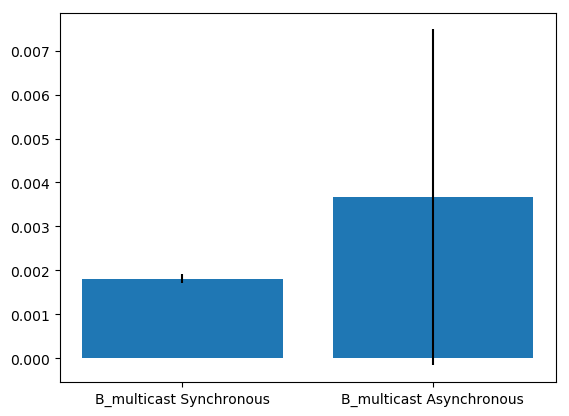

(PyObject <matplotlib.patches.Rectangle object at 0x7f71b1fb7550>,PyObject <matplotlib.patches.Rectangle object at 0x7f71b1f9a390>)

In [8]:
# bar plot
(low, high) = ci(OneSampleTTest(m_B_sync))
err_B_sync = (high - low) / 2
(low, high) = ci(OneSampleTTest(m_B_async))
err_B_async = (high - low) / 2

bar(["B_multicast Synchronous", "B_multicast Asynchronous"], [mean(m_B_sync), mean(m_B_async)], yerr=[err_B_sync, err_B_async])

    
    
**Questão**: Qual das duas versões teve o menor tempo de execução? Por quê?

**Resposta**: _A versão assíncrona, pois nela os processos podem ser executados em paralelo._



### Exercício 3: Análise de desempenho do R-multicast (3,0 pontos)

**Tarefa**: Implementar duas versões do algoritmo R-multicast: uma assíncrona e outra síncrona.

O código abaixo simula a memória de mensagens recebidas por cada processo.

In [9]:
# init memory (list) of message received of each process
m_received = Dict()
g = workers()
for p in g
    m_received[p] = ASCIIString[]
end

* R-multicast assíncrono

In [10]:
#R-multicast asynchronous
function R_multicast_async(g, m, R_deliver)
    for p in g
        if m in m_received[p]  # check duplicate
            remotecall(p, R_deliver, m)
        else  # confirm reception sending to everyone in the group
            push!(m_received[p], m)  
            R_multicast_async(g, m, R_deliver)
        end
    end
end

R_multicast_async (generic function with 1 method)

* R-multicast assíncrono

In [11]:
#R-multicast synchronous
function R_multicast_sync(g, m, R_deliver)
    for p in g
        if m in m_received[p] # check duplicate
            remotecall_wait(p, R_deliver, m)
        else  # confirm reception sending to everyone in the group
            push!(m_received[p], m)
            R_multicast_sync(g, m, R_deliver)
        end
    end
end

R_multicast_sync (generic function with 1 method)

* Medidas de tempo de execução do R-multicast síncrono e assíncrono

In [12]:
m_R_sync = measure_time(R_multicast_sync)
m_R_async = measure_time(R_multicast_async)

Round 1
	From worker 2:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worker 6:	oi!
	From worker 7:	oi!
	From worker 8:	oi!
	From worker 9:	oi!
	From worker 10:	oi!
	From worker 2:	oi!
	From worker 3:	oi!
	From worker 4:	oi!
	From worker 5:	oi!
	From worke

50-element Array{Float64,1}:
 0.0717852  
 0.000501596
 0.000473372
 0.000377703
 0.000431725
 0.000402022
 0.000439216
 0.000396115
 0.000364255
 0.000367354
 0.000357435
 0.000448919
 0.00041474 
 ⋮          
 0.00055452 
 0.000476589
 0.0634694  
 0.00057766 
 0.000515847
 0.000481333
 0.000429631
 0.000449135
 0.000542168
 0.000416968
 0.000417996
 0.000381573

**Tarefa**: Fazer a mesma análise de desempenho para o R-multicast feita no Exercício 2.

**Gráfico**:

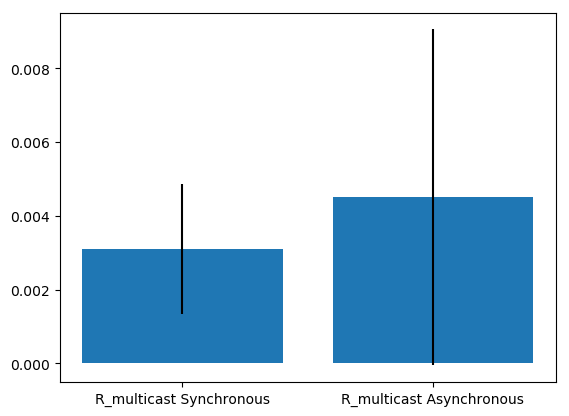

(PyObject <matplotlib.patches.Rectangle object at 0x7f71b1fb7690>,PyObject <matplotlib.patches.Rectangle object at 0x7f71af3252d0>)

In [13]:
(low, high) = ci(OneSampleTTest(m_R_sync))
err_R_sync = (high - low) / 2
(low, high) = ci(OneSampleTTest(m_R_async))
err_R_async = (high - low) / 2

bar(["R_multicast Synchronous", "R_multicast Asynchronous"], [mean(m_R_sync), mean(m_R_async)], yerr=[err_R_sync, err_R_async])

**Questão**: Qual das duas versões (R-multicast assíncrono e assíncrono) teve o menor tempo de execução? Por quê?

**Resposta**: _A versão R-multicast síncrona, em média, tem o menor tempo de execução, contudo a versão assíncrona possui muita variação de tempo de execução e alguns **outliers** podem aumentar ou diminuir significativamente seu tempo médio. Além disso, a versão assíncrona tem grandes chances de tentar fazer uma chamada remota para um processo (**worker**) que esteja ocupado, implicando em uma demora a mais e causando uma variação maior de tempo de execução._


### Exercício 4: Análise de desempenho: B-multicast vs. R-multicast (3,0 pontos)

**Questão**: Para cada uma das comparações abaixo, qual dos algoritmos teve o menor tempo de execução? Por quê?

* B-multicast assíncrono vs. R-multicast assíncrono.
    

**Resposta**: _Como pode ser visto no gráfico abaixo, o B-multicast assíncrono tem menor média de tempo que a versão R-multicast assíncrona, pois o B-multicast é mais simples e há menor risco de ser feita uma chamada remota em um processo ocupado._

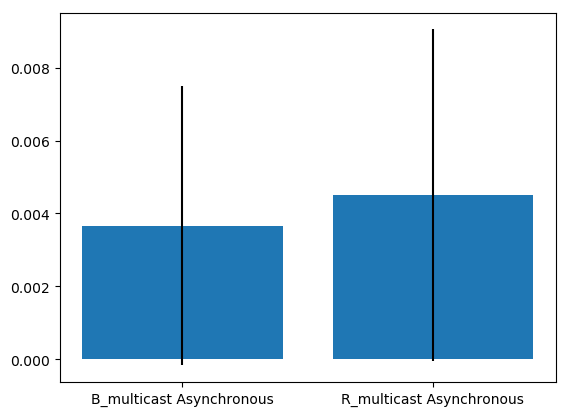

(PyObject <matplotlib.patches.Rectangle object at 0x7f71af3e2ed0>,PyObject <matplotlib.patches.Rectangle object at 0x7f71644b5c10>)

In [14]:
bar(["B_multicast Asynchronous", "R_multicast Asynchronous"], [mean(m_B_async), mean(m_R_async)], yerr=[err_B_async, err_R_async])

* B-multicast síncrono vs. R-multicast síncrono.

**Resposta**: _Como mostrado no gráfico abaixo, o B-multicast síncrono obtem uma média de tempo menor que o R-multicast síncrono, além de um menor intervalo de confiança. Por ter mais instruções de comando (uma condicional e uma chamada recursima a mais), o R-multicast demora mais tempo de processamento._

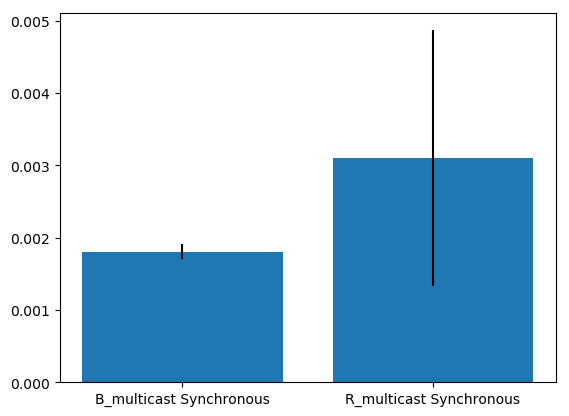

(PyObject <matplotlib.patches.Rectangle object at 0x7f7164407fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7f71643e7190>)

In [15]:
bar(["B_multicast Synchronous", "R_multicast Synchronous"], [mean(m_B_sync), mean(m_R_sync)], yerr=[err_B_sync, err_R_sync])

### Extra: Análise de intervalo de confiança.

_Abaixo está uma implementação e um gráfico para analisar a variação dos intervalos de confiança de cada versão.
Pode observar que as versões síncronas, para o B-multicast e R-multicast, possuem um intervalo de confiança menor que suas verões assíncronas. Isso mostra que as versões assíncronas possuem maior variação dos seu tempo de execução._

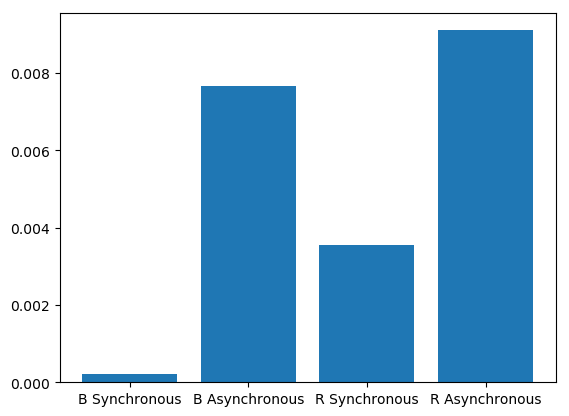

(PyObject <matplotlib.patches.Rectangle object at 0x7f71645409d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f71643a56d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f71645725d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f716432f9d0>)

In [16]:
ci_B_sync = ci(OneSampleTTest(m_B_sync))
ci_B_async = ci(OneSampleTTest(m_B_async))
ci_R_sync = ci(OneSampleTTest(m_R_sync))
ci_R_async = ci(OneSampleTTest(m_R_async))

mod_ci_B_sync = ci_B_sync[2] - ci_B_sync[1]
mod_ci_B_async = ci_B_async[2] - ci_B_async[1]
mod_ci_R_sync = ci_R_sync[2] - ci_R_sync[1]
mod_ci_R_async = ci_R_async[2] - ci_R_async[1]

x = ["B Synchronous", "B Asynchronous", "R Synchronous", "R Asynchronous"]
y = [mod_ci_B_sync, mod_ci_B_async, mod_ci_R_sync, mod_ci_R_async]

bar(x, y)

## Entrega

As respostas deverão ser entregues nos devidos campos desse arquivo, ou seja, em [Markdown](https://en.wikipedia.org/wiki/Markdown) e no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl).

O programa deve ser implementado na linguagem de programação **Julia**. Seu trabalho será testado na [JuliaBox](https://juliabox.com), portanto teste seu arquivo IJulia na JulizBox antes de enviá-lo.


### Forma 

O arquivo IJulia Notebook deverá ser entregue ao Professor **exclusivamente por e-mail** para o seguinte endereço: **prof.alage** (no) **gmail com**


Será registrada como data de recebimento do trabalho a data indicada pelo servidor de e-mail do Professor. 

A responsabilidade sobre a integridade do arquivo contendo trabalho é exclusivamente dos discentes. Serão ignorados os trabalhos cujos arquivos não conseguirem ser abertos ou se o e-mail não chegar à caixa de entrada de e-mail do Professor.

### Prazos

O prazo de entrega sem atraso é o dia **12/05/2017**.

Trabalhos entregues com atraso serão aceitos, no máximo, até o o dia **14/05/2017**. Serão descontados 5% da nota obtida por dia de atraso.


## Pontuação extra

O(a) discente que realizar mais tarefas, além do que foi especificado neste trabalho, o professor atribuirá de 0,5 a 1,0 ponto extra a depender da relevância da contribuição no programa. O critério será decidido pelo professor. 

O(a) discente deve indicar qual é a tarefa executada. Por exemplo, adição de funcionalidades, armazenamento de dados em arquivo, documentação de código, comentários em inglês sem erros ortográficos, etc.


**Plágio** A nota zero será atribuída caso haja qualquer tipo de cópia parcial ou integral assim como as devidas medidas legais. Leia a [cartilha sobre plágio](http://www.noticias.uff.br/arquivos/cartilha-sobre-plagio-academico.pdf).

## Disclaimer

Esse material foi elaborado pelo [Prof. André Lage Freitas](https://sites.google.com/a/ic.ufal.br/andrelage/) e está licenciado sob a licença _GNU General Public License v3.0_.